In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Wed Sep  4 19:19:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install --upgrade ultralytics

from ultralytics import YOLO

# Load a pre-trained YOLOv10n model
model = YOLO("yolov10n.pt")


100%|██████████| 5.59M/5.59M [00:00<00:00, 91.2MB/s]


In [ ]:
model = YOLO(f'{HOME}/yolov10n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 dog, 48.0ms
Speed: 2.5ms preprocess, 48.0ms inference, 27.6ms postprocess per image at shape (1, 3, 640, 384)


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov10s.pt data='/content/datasets/PotholeDetection-1/data.yaml' epochs=100 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/datasets/PotholeDetection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1674045326.2b5c9f3b39fe.12420.0  train_batch585.jpg
F1_curve.png					     train_batch586.jpg
P_curve.png					     train_batch587.jpg
PR_curve.png					     val_batch0_labels.jpg
predictions.json				     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     weights
train_batch0.jpg


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model="/content/drive/MyDrive/trainyolo_purdue_v10/weights/best.pt" conf=0.2 source="/content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4" save=True

/content
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,035,734 parameters, 0 gradients, 24.4 GFLOPs

video 1/1 (frame 1/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 (no detections), 44.8ms
video 1/1 (frame 2/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 3 Potholes, 16.9ms
video 1/1 (frame 3/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 2 Potholes, 17.0ms
video 1/1 (frame 4/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 2 Potholes, 16.9ms
video 1/1 (frame 5/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 3 Potholes, 17.1ms
video 1/1 (frame 6/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 5 Potholes, 17.0ms
video 1/1 (frame 7/692) /content/drive/MyDrive/PurdueWork/potholesinaruralroad.mp4: 480x800 2 Potholes, 17.0ms
video 1/1 (frame 8/692) /content/dri

In [3]:
from IPython.display import Image, display

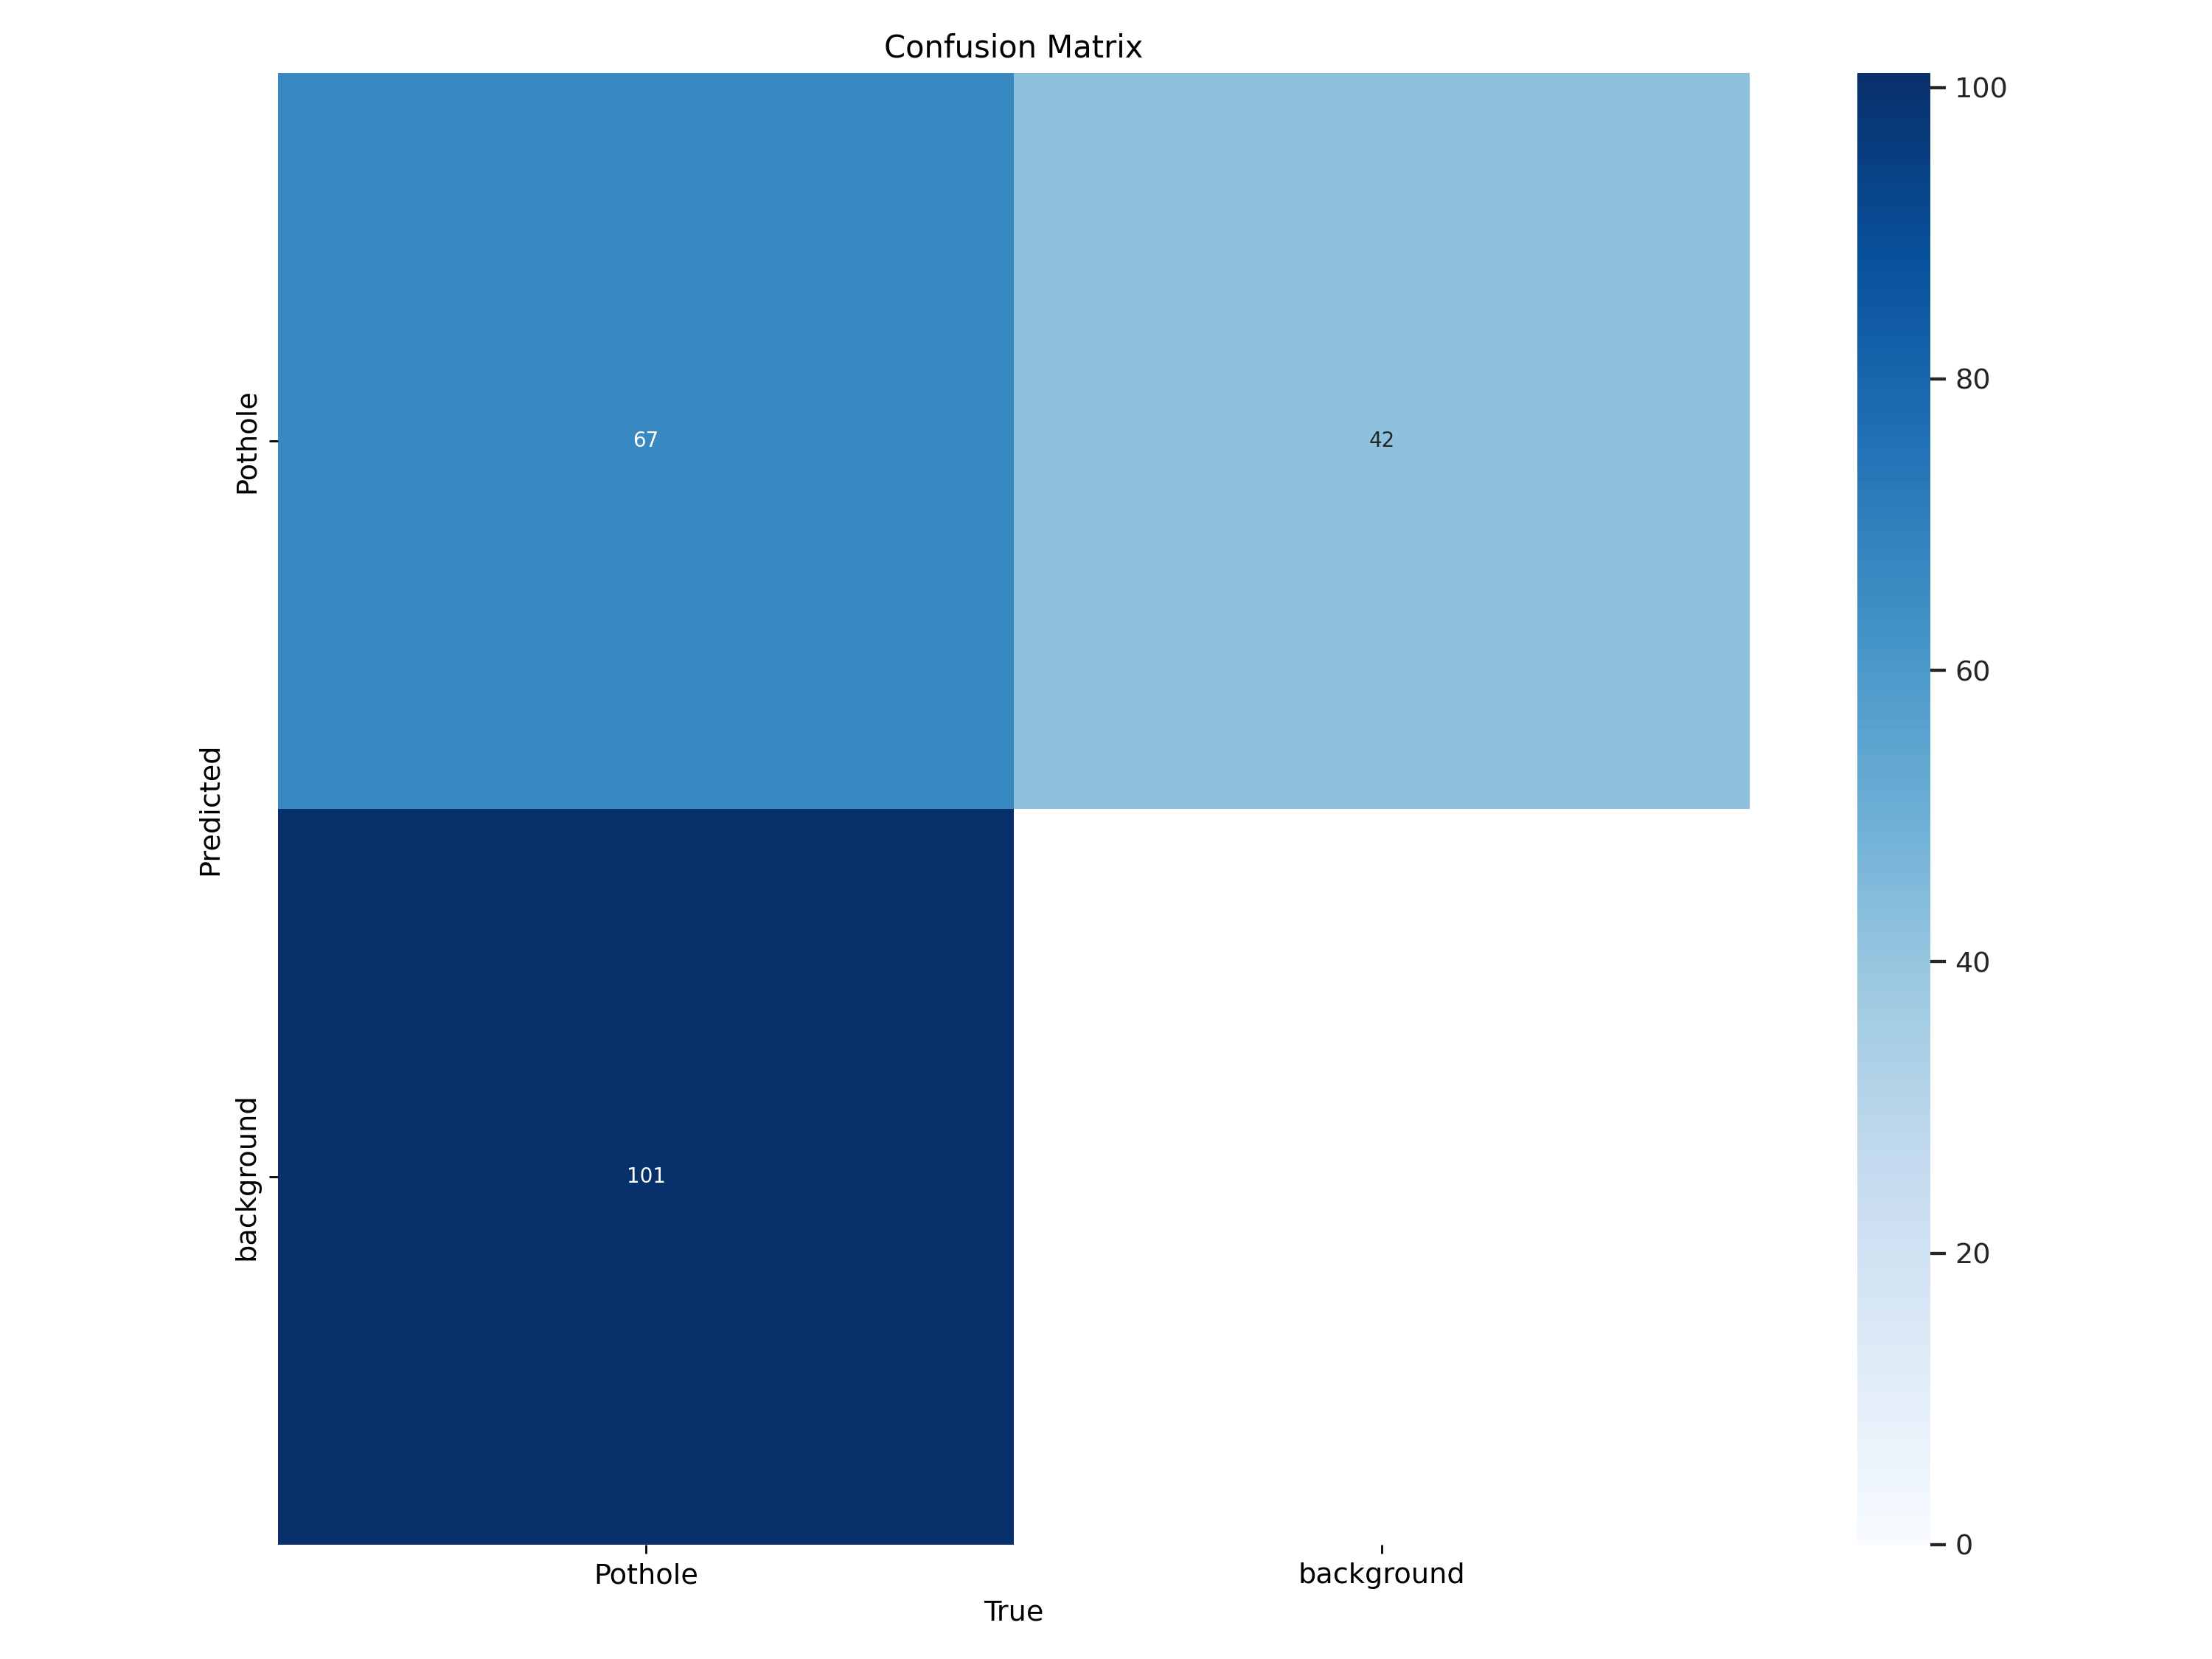

In [4]:
Image(filename = '/content/drive/MyDrive/PurdueWork/trainyolo_purdue_v10/confusion_matrix.png', width = 900)

